In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicHermiteSpline, CubicSpline
from scipy.optimize import fsolve

# Laboratorio 04: Interpolación.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Juan Sebastian Novoa Ortiz
*Métodos computacionales 2025-I*

---

# 1.

Un automóvil que viaja a lo largo de una carretera recta es cronometrado en varios puntos. Los datos de las observaciones se dan en la siguiente tabla, donde el tiempo está en segundos, la distancia en metros y la velocidad en metros por segundo.

```
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
```

- Usar un polinomio de Hermite y de Splines Cúbicos para predecir la posición del automóvil y su velocidad cuando $t=10$ s.
- ¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

--- Predicciones para t = 10.0 s ---
Metodo Hermite:       Posicion = 771.96 m, Velocidad = 74.64 m/s
Metodo Spline Cubico: Posicion = 778.42 m, Velocidad = 75.82 m/s

--- Velocidad Maxima Predicha en el Intervalo [0, 13] s ---
Metodo Hermite:       Velocidad maxima = 82.00 m/s
Metodo Spline Cubico: Velocidad maxima = 80.27 m/s


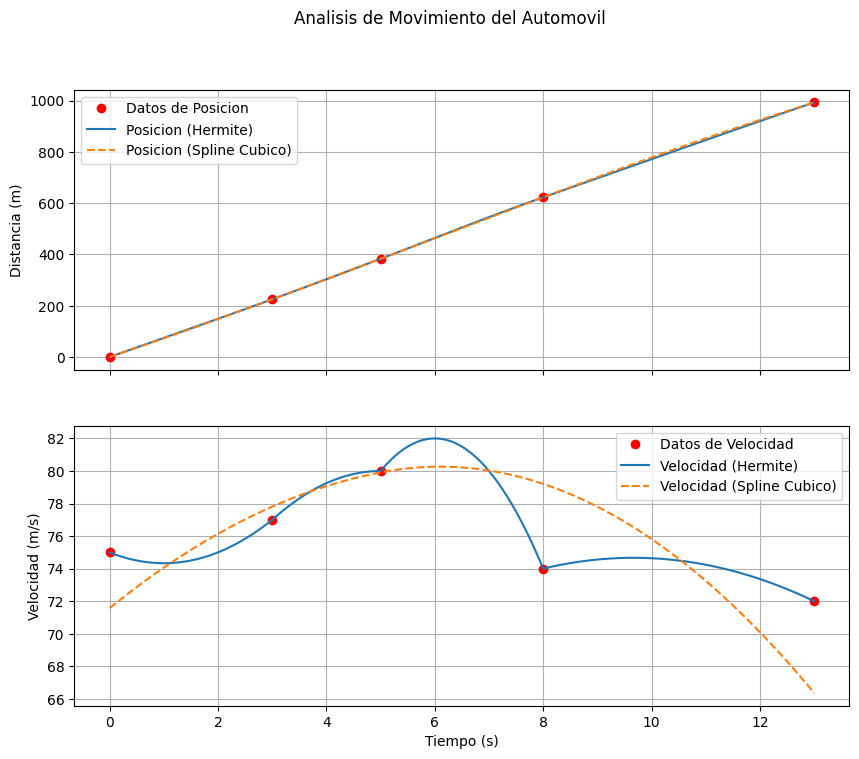

In [2]:
# --- 1. Datos del Problema ---

# se definen los datos de las observaciones en arrays de numpy
tiempos = np.array([0, 3, 5, 8, 13])  # segundos
distancias = np.array([0, 225, 383, 623, 993])  # metros
velocidades = np.array([75, 77, 80, 74, 72])  # m/s

# --- 2. Creacion de los Modelos de Interpolacion ---

# se crea el spline de Hermite, que usa los valores de posicion y velocidad
spline_hermite = CubicHermiteSpline(tiempos, distancias, velocidades)

# se crea un spline cubico natural, que solo usa los valores de posicion
spline_cubico = CubicSpline(tiempos, distancias)

# --- 3. Prediccion de Posicion y Velocidad en t=10s ---

# punto de tiempo para la prediccion
tiempo_prediccion = 10.0

# se obtiene la funcion de velocidad para cada modelo derivando el spline de posicion
funcion_velocidad_hermite = spline_hermite.derivative()
funcion_velocidad_cubico = spline_cubico.derivative()

# se evalua la posicion y la velocidad en t=10s
posicion_hermite_t10 = spline_hermite(tiempo_prediccion)
velocidad_hermite_t10 = funcion_velocidad_hermite(tiempo_prediccion)

posicion_cubico_t10 = spline_cubico(tiempo_prediccion)
velocidad_cubico_t10 = funcion_velocidad_cubico(tiempo_prediccion)

print(f"--- Predicciones para t = {tiempo_prediccion} s ---")
print(f"Metodo Hermite:       Posicion = {posicion_hermite_t10:.2f} m, Velocidad = {velocidad_hermite_t10:.2f} m/s")
print(f"Metodo Spline Cubico: Posicion = {posicion_cubico_t10:.2f} m, Velocidad = {velocidad_cubico_t10:.2f} m/s")


# --- 4. Calculo de la Velocidad Maxima ---

# la velocidad maxima ocurre en los extremos del intervalo [0, 13] o donde la aceleracion (v') es cero.
# la aceleracion es la segunda derivada del spline de posicion.
funcion_aceleracion_hermite = spline_hermite.derivative(nu=2)
funcion_aceleracion_cubico = spline_cubico.derivative(nu=2)

# se encuentran los puntos donde la aceleracion es cero (puntos criticos)
puntos_criticos_hermite = funcion_aceleracion_hermite.roots()
puntos_criticos_cubico = funcion_aceleracion_cubico.roots()

# se consideran solo los puntos criticos que estan dentro de nuestro intervalo de tiempo
puntos_criticos_hermite_validos = puntos_criticos_hermite[(puntos_criticos_hermite >= 0) & (puntos_criticos_hermite <= 13)]
puntos_criticos_cubico_validos = puntos_criticos_cubico[(puntos_criticos_cubico >= 0) & (puntos_criticos_cubico <= 13)]

# se crea una lista de tiempos a verificar (extremos + puntos criticos) para cada metodo
tiempos_a_verificar_hermite = np.concatenate(([0, 13], puntos_criticos_hermite_validos))
tiempos_a_verificar_cubico = np.concatenate(([0, 13], puntos_criticos_cubico_validos))

# se evalua la velocidad en todos los tiempos candidatos y se encuentra el maximo
velocidad_max_hermite = np.max(funcion_velocidad_hermite(tiempos_a_verificar_hermite))
velocidad_max_cubico = np.max(funcion_velocidad_cubico(tiempos_a_verificar_cubico))


print("\n--- Velocidad Maxima Predicha en el Intervalo [0, 13] s ---")
print(f"Metodo Hermite:       Velocidad maxima = {velocidad_max_hermite:.2f} m/s")
print(f"Metodo Spline Cubico: Velocidad maxima = {velocidad_max_cubico:.2f} m/s")


# --- Grafica Opcional para Visualizacion ---
x_grafica = np.linspace(min(tiempos), max(tiempos), 300)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
fig.suptitle('Analisis de Movimiento del Automovil')

# grafica de posicion
ax1.plot(tiempos, distancias, 'o', color='red', label='Datos de Posicion')
ax1.plot(x_grafica, spline_hermite(x_grafica), label='Posicion (Hermite)')
ax1.plot(x_grafica, spline_cubico(x_grafica), '--', label='Posicion (Spline Cubico)')
ax1.set_ylabel('Distancia (m)')
ax1.legend(); ax1.grid(True)

# grafica de velocidad
ax2.plot(tiempos, velocidades, 'o', color='red', label='Datos de Velocidad')
ax2.plot(x_grafica, funcion_velocidad_hermite(x_grafica), label='Velocidad (Hermite)')
ax2.plot(x_grafica, funcion_velocidad_cubico(x_grafica), '--', label='Velocidad (Spline Cubico)')
ax2.set_ylabel('Velocidad (m/s)')
ax2.set_xlabel('Tiempo (s)')
ax2.legend(); ax2.grid(True)

plt.show()

# 2.
Los valores de la aceleración gravitacional $g$ dependen de la altitud $y$ según se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar el valor de la aceleración gravitacional a las altitudes de 5,000 m, 42,000 m y 90,000 m. Grafique la distribución de la función de interpolación obtenida junto con los datos dados.

```
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
```

--- Estimaciones de Gravedad con Polinomio de Newton ---
g(5000 m) = 9.7947 m/s^2
g(42000 m) = 9.6819 m/s^2
g(90000 m) = 9.5384 m/s^2


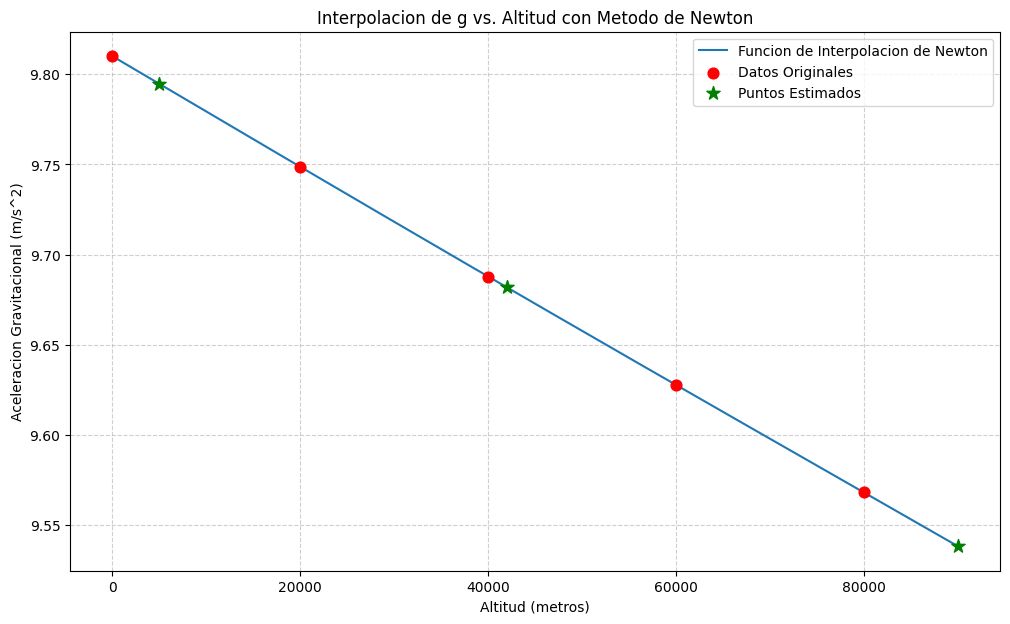

In [3]:
# --- 1. Funciones para Interpolacion de Newton ---#
# estas funciones construyen y evaluan el polinomio de diferencias divididas de newton.

def diferencias_divididas(puntos_x, puntos_y, j, i=0):
    """
    # funcion recursiva para calcular una diferencia dividida f[y_i, ..., y_j].
    # es el bloque fundamental para construir el polinomio de newton.
    """
    # caso base: la diferencia dividida de un solo punto es el propio valor del punto.
    if i == j:
        return puntos_y[i]
    # paso recursivo: se calcula la diferencia dividida usando dos valores previos.
    else:
        numerador = diferencias_divididas(puntos_x, puntos_y, j, i = i + 1) - diferencias_divididas(puntos_x, puntos_y, j-1, i = i)
        denominador = puntos_x[j] - puntos_x[i]
        return numerador / denominador

def calcular_coeficientes(puntos_x, puntos_y):
    """
    # calcula todos los coeficientes a_i del polinomio de newton.
    # cada coeficiente a_j es la diferencia dividida f[y_0, ..., y_j].
    """
    # se crea un arreglo para almacenar los coeficientes.
    n = len(puntos_x)
    coefs = np.zeros(n, dtype=float)

    # se itera para calcular cada coeficiente usando la funcion de diferencias divididas.
    for j in range(n):
        coefs[j] = diferencias_divididas(puntos_x, puntos_y, j)
    return coefs

def polinomio_newton(puntos_x, puntos_y, valor_x_a_evaluar):
    """
    # evalua el polinomio de newton para un valor de x dado (valor_x_a_evaluar).
    # construye el valor del polinomio termino a termino.
    """
    # primero se obtienen los coeficientes necesarios.
    coeficientes_a = calcular_coeficientes(puntos_x, puntos_y)
    n = len(puntos_x)

    # se inicia el polinomio con el primer coeficiente (a_0).
    resultado_p = coeficientes_a[0]

    # se inicia el producto de los terminos (x - x_i).
    productoria = 1.0

    # se anaden los demas terminos del polinomio.
    for i in range(1, n):
        # se actualiza la productoria con el termino (x - x_{i-1}).
        productoria *= (valor_x_a_evaluar - puntos_x[i-1])
        # se anade el termino a_i * productoria al resultado.
        resultado_p += coeficientes_a[i] * productoria

    return resultado_p

# --- 2. Datos del Problema ---#
# se definen los datos de altitud y gravedad proporcionados en la tabla.
# 'altitudes' es la variable independiente (coordenada x).
# 'gravedades' es la variable dependiente (coordenada y).
altitudes = np.array([0, 20000, 40000, 60000, 80000])  # en metros
gravedades = np.array([9.8100, 9.7487, 9.6879, 9.6278, 9.5682])  # en m/s^2

# --- 3. Estimacion de Gravedad en Puntos Especificos ---#
# se definen las altitudes para las cuales se quiere estimar la gravedad.
altitudes_a_estimar = np.array([5000, 42000, 90000])

# se itera sobre cada altitud para calcular y mostrar el resultado.
print("--- Estimaciones de Gravedad con Polinomio de Newton ---")
for h in altitudes_a_estimar:
    g_aproximada = polinomio_newton(altitudes, gravedades, h)
    print(f"g({h} m) = {g_aproximada:.4f} m/s^2")

# --- 4. Generacion de Puntos para la Grafica ---#
# se crea un rango de altitudes para poder dibujar una curva suave del polinomio.
# el rango va desde la minima altitud conocida hasta la maxima altitud a estimar.
altitudes_grafica = np.linspace(min(altitudes), 90000, 200)

# se calculan los valores de gravedad correspondientes para la curva suave.
gravedades_grafica = polinomio_newton(altitudes, gravedades, altitudes_grafica)
gravedades_estimadas = polinomio_newton(altitudes, gravedades, altitudes_a_estimar)

# --- 5. Visualizacion de Resultados ---#
# se configura la grafica usando matplotlib.
plt.figure(figsize=(12, 7))

# se dibuja la curva del polinomio de interpolacion.
plt.plot(altitudes_grafica, gravedades_grafica, label='Funcion de Interpolacion de Newton')

# se marcan los puntos de datos originales con circulos rojos.
plt.scatter(altitudes, gravedades, color='red', s=60, zorder=5, label='Datos Originales')

# se marcan los puntos especificamente estimados con estrellas verdes.
plt.scatter(altitudes_a_estimar, gravedades_estimadas, color='green', marker='*', s=100, zorder=5, label='Puntos Estimados')

# se configura la apariencia y etiquetas de la grafica.
plt.xlabel("Altitud (metros)")
plt.ylabel("Aceleracion Gravitacional (m/s^2)")
plt.title("Interpolacion de g vs. Altitud con Metodo de Newton")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# 3.
La densidad del aire $\rho$ depende de la temperatura $T$ como se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar los valores de la densidad del aire a 250 K, 800 K y 3,000 K. Luego, determine la densidad del aire a temperaturas desde 100 K hasta 2,500 K en intervalos de 10 K. Grafique la distribución de la densidad del aire calculada en función de la temperatura.

```
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
```



--- Estimaciones de la Densidad del Aire ---
Para una temperatura de 250 K, la densidad estimada es: 1.3975 kg/m^3
Para una temperatura de 800 K, la densidad estimada es: 0.4964 kg/m^3
Para una temperatura de 3000 K, la densidad estimada es: 1561.1659 kg/m^3


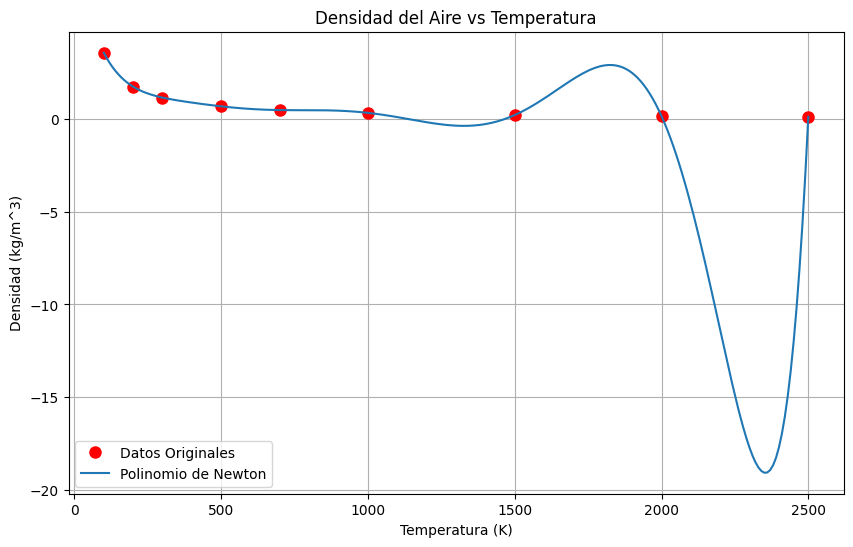

In [3]:
# se reutilizan las funciones para el polinomio de Newton
def diferencias_divididas_recursivo(puntos_x, puntos_y, j, i=0):
    if i == j: return puntos_y[i]
    else: return (diferencias_divididas_recursivo(puntos_x, puntos_y, j, i=i+1) - diferencias_divididas_recursivo(puntos_x, puntos_y, j-1, i=i)) / (puntos_x[j] - puntos_x[i])

def calcular_coeficientes_newton(puntos_x, puntos_y):
    num_puntos = len(puntos_x)
    coeficientes = np.zeros(num_puntos, dtype=float)
    for j in range(num_puntos):
        coeficientes[j] = diferencias_divididas_recursivo(puntos_x, puntos_y, j)
    return coeficientes

def evaluar_polinomio_newton(puntos_x, coeficientes, x_eval):
    polinomio_evaluado = coeficientes[0]
    termino_producto = 1.0
    for j in range(1, len(puntos_x)):
        termino_producto *= (x_eval - puntos_x[j-1])
        polinomio_evaluado += coeficientes[j] * termino_producto
    return polinomio_evaluado

# --- Datos y Calculos ---
temperaturas_T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
densidades_rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3

# se calculan los coeficientes del polinomio
coeficientes = calcular_coeficientes_newton(temperaturas_T, densidades_rho)

# se definen las temperaturas a estimar
temperaturas_estimar = [250, 800, 3000]

print("--- Estimaciones de la Densidad del Aire ---")
for temp in temperaturas_estimar:
    rho_estimada = evaluar_polinomio_newton(temperaturas_T, coeficientes, temp)
    print(f"Para una temperatura de {temp} K, la densidad estimada es: {rho_estimada:.4f} kg/m^3")

# --- Grafica de la Distribucion de Densidad ---
# se crea el rango de temperaturas solicitado (100K a 2500K en intervalos de 10K)
temp_grafica = np.arange(100, 2501, 10)
rho_grafica = evaluar_polinomio_newton(temperaturas_T, coeficientes, temp_grafica)

plt.figure(figsize=(10, 6))
plt.plot(temperaturas_T, densidades_rho, 'o', color='red', markersize=8, label='Datos Originales')
plt.plot(temp_grafica, rho_grafica, label='Polinomio de Newton')
plt.title('Densidad del Aire vs Temperatura')
plt.xlabel('Temperatura (K)')
plt.ylabel('Densidad (kg/m^3)')
plt.legend()
plt.grid(True)
plt.show()

# 4.
Uno de los dispositivos más precisos para medir temperatura es el termómetro de resistencia de platino, también conocido como RTD. En este dispositivo, un alambre delgado y largo de platino se enrolla alrededor de un carrete y se encapsula en una cubierta de acero inoxidable. La resistencia del alambre cambia de manera muy lineal con la temperatura. Una longitud típica de alambre tiene una resistencia de aproximadamente 100 $\Omega$ a $0^{\circ}$ C y cambia alrededor de 0.39 $\Omega/^{\circ}$ C. Por lo tanto, para medir temperaturas con precisión, es necesario poder medir cambios en la resistencia con alta resolución. Tradicionalmente, se ha utilizado el circuito de puente desequilibrado para esto, como se ilustra en la figura, el cual proporciona un voltaje de salida pequeño que es proporcional (aunque no linealmente) a la resistencia del sensor.

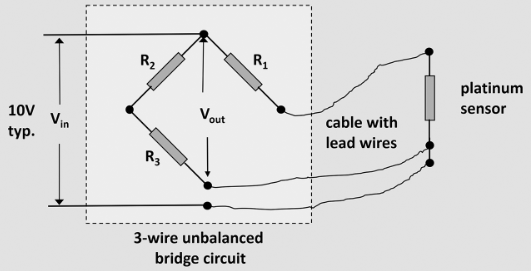




A continuación se presentan mediciones tomadas de dicho circuito, con $R_1 = R_2 = 5$ $k\Omega$ y $R_3 = 120$ $\Omega$:

```
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
```

Un termómetro de resistencia de platino estándar de 100 $\Omega$ tiene una resistencia de 139.27 $\Omega$ a $100^\circ$ C. Utilice el método de interpolación que desee para estimar el voltaje de salida del puente en estas condiciones. Si la salida del puente se mide en 0 voltios, estime la resistencia medida. ¿Qué conclusión puede obtener?

In [4]:
# --- Datos y Calculos ---
resistencias = np.array([100, 115, 130, 145, 160, 175])
voltajes = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])

# se crea un spline cubico para interpolar la relacion entre resistencia y voltaje
# este metodo es robusto y adecuado para datos de sensores
spline_voltaje = CubicSpline(resistencias, voltajes)

# --- Estimacion 1: Voltaje a 139.27 Ohms ---
resistencia_a_estimar = 139.27
voltaje_estimado = spline_voltaje(resistencia_a_estimar)

print(f"--- Estimaciones del Circuito RTD ---")
print(f"Para una resistencia de {resistencia_a_estimar} Ohms, el voltaje de salida estimado es: {voltaje_estimado:.4f} V")

# --- Estimacion 2: Resistencia a 0 Voltios ---
# esto es un problema de busqueda de raices: encontrar R tal que V(R) = 0.
# usamos fsolve, un buscador de raices numerico. necesita una conjetura inicial.
# observando los datos, el voltaje cruza cero entre 115 y 130 ohms, asi que 120 es una buena conjetura.
resistencia_cero_voltios = fsolve(spline_voltaje, x0 = 120)

# fsolve devuelve un array, tomamos el primer (y unico) elemento
print(f"Si la salida del puente es 0 V, la resistencia estimada es: {resistencia_cero_voltios[0]:.2f} Ohms")

# --- Conclusion ---
print("\nConclusion:")
print("La interpolacion nos permite crear un 'modelo matematico' del comportamiento del sensor a partir de unos pocos puntos de calibracion.")
print("Con este modelo, podemos estimar con precision tanto el voltaje para cualquier resistencia (medir temperatura) como la resistencia para cualquier voltaje (analizar la salida del circuito).")
print(f"El punto de balance del puente (0 V) ocurre a los {resistencia_cero_voltios[0]:.2f} Ohms.")

--- Estimaciones del Circuito RTD ---
Para una resistencia de 139.27 Ohms, el voltaje de salida estimado es: -0.3702 V
Si la salida del puente es 0 V, la resistencia estimada es: 120.00 Ohms

Conclusion:
La interpolacion nos permite crear un 'modelo matematico' del comportamiento del sensor a partir de unos pocos puntos de calibracion.
Con este modelo, podemos estimar con precision tanto el voltaje para cualquier resistencia (medir temperatura) como la resistencia para cualquier voltaje (analizar la salida del circuito).
El punto de balance del puente (0 V) ocurre a los 120.00 Ohms.


# 5.
El índice de refracción del vidrio de borosilicato a diferentes longitudes de onda se presenta en la siguiente tabla. Estime la longitud de onda donde el índice de refracción es 1.520.

```
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])
```

--- Estimacion de la Longitud de Onda ---
Para un indice de refraccion de 1.52, la longitud de onda estimada es: 4481.09 Å


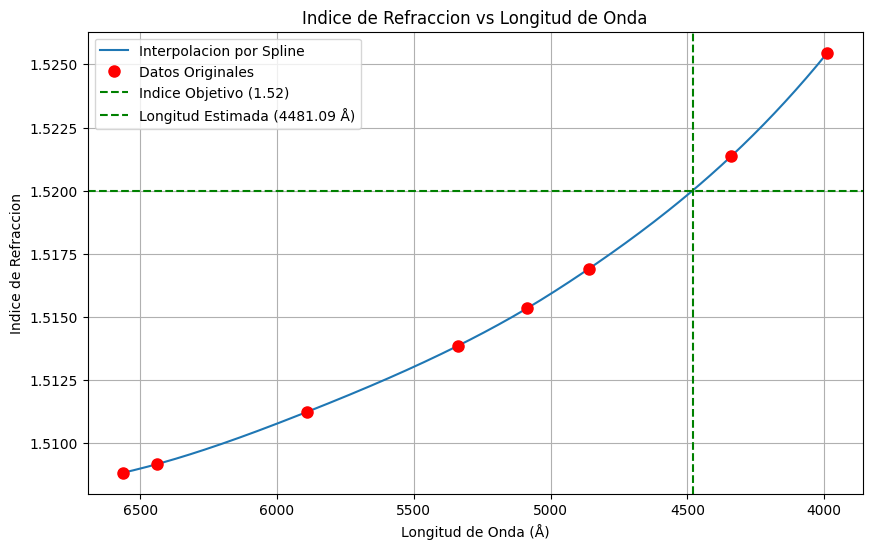

In [5]:
# --- 1. Datos del Problema ---

# se definen los datos de calibracion del vidrio
longitudes_onda = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Angstroms (Å)
indices_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

# valor del indice para el cual queremos encontrar la longitud de onda
indice_objetivo = 1.520

# --- 2. Creacion del Modelo de Interpolacion ---

# se crea un spline cubico para modelar la relacion y = f(x),
# donde 'x' es la longitud de onda y 'y' es el indice de refraccion.
indices_ordenados = np.argsort(longitudes_onda)
spline_indice = CubicSpline(longitudes_onda[indices_ordenados], indices_refraccion[indices_ordenados])

# --- 3. Busqueda de la Solucion con fsolve ---

# el problema es encontrar 'lambda' tal que spline_indice(lambda) = 1.520
# esto es equivalente a encontrar la raiz de la funcion: f(lambda) - 1.520 = 0
funcion_para_raiz = lambda l: spline_indice(l) - indice_objetivo

# para fsolve, necesitamos una conjetura inicial.
# observando la tabla, el valor 1.520 esta entre los indices para 4340 Å y 4861 Å.
# usaremos 4500 como una buena conjetura inicial.
conjetura_inicial = 4500
longitud_solucion = fsolve(funcion_para_raiz, x0=conjetura_inicial)

# fsolve devuelve un array, por lo que tomamos el primer elemento
longitud_estimada = longitud_solucion[0]

# --- 4. Presentacion de Resultados ---

print("--- Estimacion de la Longitud de Onda ---")
print(f"Para un indice de refraccion de {indice_objetivo}, la longitud de onda estimada es: {longitud_estimada:.2f} Å")


# --- Grafica para Visualizar la Solucion ---
# se crea un rango de puntos para graficar la curva del spline
x_grafica = np.linspace(min(longitudes_onda), max(longitudes_onda), 200)
y_grafica = spline_indice(x_grafica)

plt.figure(figsize=(10, 6))
# se grafica la curva del spline y los puntos originales
plt.plot(x_grafica, y_grafica, label='Interpolacion por Spline')
plt.plot(longitudes_onda, indices_refraccion, 'o', color='red', markersize=8, label='Datos Originales')

# se dibujan lineas para mostrar el punto de la solucion encontrada
plt.axhline(y=indice_objetivo, color='green', linestyle='--', label=f'Indice Objetivo ({indice_objetivo})')
plt.axvline(x=longitud_estimada, color='green', linestyle='--', label=f'Longitud Estimada ({longitud_estimada:.2f} Å)')

plt.title('Indice de Refraccion vs Longitud de Onda')
plt.xlabel('Longitud de Onda (Å)')
plt.ylabel('Indice de Refraccion')
# se invierte el eje x para que coincida con el orden de los datos originales
plt.gca().invert_xaxis()
plt.legend()
plt.grid(True)
plt.show()